                                            NOTEBOOK 2- TEMPTETURE READERS

**TABLE OF CONTENT**

1. INTRODUCTION
    
    1.1 STEPS FOLLOWED


2. DIFFERENCING AND MEKE THE TEMPRETURE READERS STATIONARY
    
    2.1 JDB DATA 
        2.1.1 SERIES A     
        2.1.2 SERIES B                                        
        2.1.3 SERIES C
        2.1.4 SERIES D
    
    2.2 SMARCH DATA
    
    2.3 EMS DATA (SQUIRELL DATA)
    
    2.4 TINYTAG DATA
   
   
3. ANOVA TEST


4. HANDLING OUTLIERS
    
    4.1 JDB DATA 
        4.1.1 SERIES A     
        4.1.2 SERIES B                                        
        4.1.3 SERIES C
        4.1.4 SERIES D
    
    4.2 SMARCH DATA
    
    4.3 EMS DATA (SQUIRELL DATA)
    
    4.4 TINYTAG DATA
 
 
5. CALCULATE DAILY MEANS 


6. FINDING THE NUMBER OF MISSING DAYS 

#  INTRODUCTION

To calibrate all the temperature readers together, we need to ascertain whether these readers belong to the same population. 
- To determine this, we should conduct an ANOVA test among the readers. 
- Before applying any statistical test to time series data, we must ensure the data is stationary. 
- To achieve this, we employ a technique known as differencing. Differencing serves to eliminate the impact of underlying patterns, thus rendering the series' statistical properties consistent over time.

##  STEPS FOLLOWED 

1. Make all the tempreture readers staionary by differencing 
2. Run the The Augmented Dickey-Fuller (ADF) test, which is a statistical test used to assess whether a time series has become stationary
3. Plot the original and differenced data
4. Perform the ANOVA test for the diffrenced readers
5. Before caliberating all the readers, make sure the readers does not have any extreme outliers
6. Get the daily means of the each readers and caliberate all the differnce readers into a single time series.
7. Determine how many days are missing from the time series 


# DIFFERENCING AND MAKING THE TEMPRETURE READERS STATIONARY

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## JDB DATA 

### SERIES A

In [4]:

df_A = pd.read_excel('Series A.xlsx')
# Convert the 'Date' column to datetime format for time-based operations
df_A['Date'] = pd.to_datetime(df_A['Date'])
# Set the 'Date' column as the index of the dataframe for time series analysis
df_A.set_index('Date', inplace=True)
# Interpolate missing values in the 'Temperature' column using linear interpolation
df_A['Temperature'].interpolate(method='linear', inplace=True)
# Calculate the differenced series by subtracting each value from the previous one
df_A['Differenced Series A'] = df_A['Temperature'].diff()
# Remove rows with NaN (missing) values, which may have been generated by differencing
df_A.dropna(inplace=True)
#the first few rows of the dataframe to inspect the result
print(df_A.head())


            Property      Time  Temperature  Differenced Series A
Date                                                             
2009-01-15        18  18:32:00      7.93974               0.00469
2009-01-15        19  19:02:00      7.93348              -0.00626
2009-01-15        20  19:32:00      7.92566              -0.00782
2009-01-15        21  20:02:00      7.92254              -0.00312
2009-01-15        22  20:32:00      7.91941              -0.00313


In [15]:
from statsmodels.tsa.stattools import adfuller
# Apply the ADF test to the differenced time series data in 'Differenced Series A' column
# and store the result in 'adf_result'. The 'dropna()' method is used to remove any
# NaN (missing) values from the series before conducting the test.
adf_result = adfuller(df_A['Differenced Series A'].dropna())
# Print the p-value obtained from the ADF test, which is a statistical measure
# used to assess whether the time series is stationary or not. A small p-value (less than 0.05)
# indicates that the series is likely stationary.
print("ADF p-value:", adf_result[1])

ADF p-value: 0.0


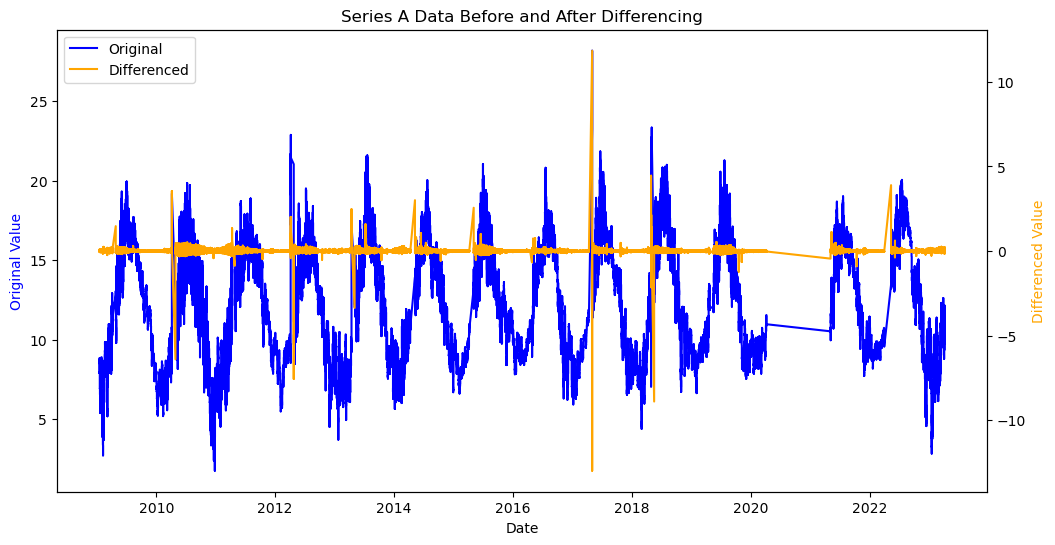

In [17]:

#plotting the time series to see whether the data has become stationary
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_A.index, df_A['Temperature'], label='Original', color='blue')
ax2 = ax.twinx()
ax2.plot(df_A.index, df_A['Differenced Series A'], label='Differenced', color='orange')

ax.set_xlabel('Date')
ax.set_ylabel('Original Value', color='blue')
ax2.set_ylabel('Differenced Value', color='orange')
plt.title('Series A Data Before and After Differencing')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


### SERIES B

In [10]:
#continuing with the same process as above....

In [11]:
df_B = pd.read_excel('Series B.xlsx')
df_B['Date'] = pd.to_datetime(df_B['Date'])
df_B.set_index('Date', inplace=True)
df_B['Temperature'].interpolate(method='linear', inplace=True)
df_B['Differenced Series B'] = df_B['Temperature'].diff()
df_B.dropna(inplace=True)
print(df_B.head())

            Property      Time  Temperature  Differenced Series B
Date                                                             
2009-01-15        18  18:31:00      7.92097               0.00469
2009-01-15        19  19:01:00      7.91784              -0.00313
2009-01-15        20  19:31:00      7.91159              -0.00625
2009-01-15        21  20:01:00      7.90846              -0.00313
2009-01-15        22  20:31:00      7.89907              -0.00939


In [4]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_B['Differenced Series B'].dropna())
print("ADF p-value:", adf_result[1])

ADF p-value: 0.0


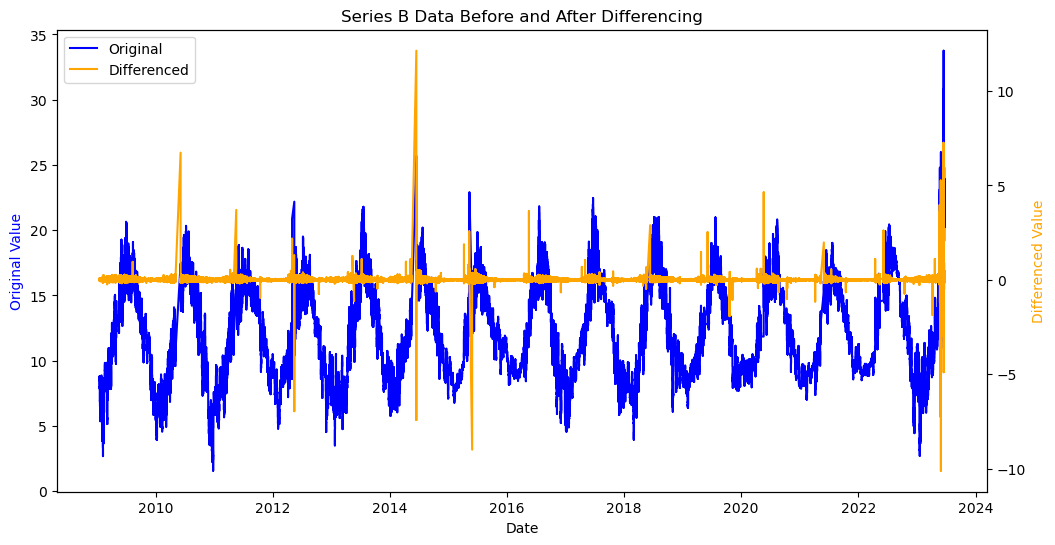

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_B.index, df_B['Temperature'], label='Original', color='blue')
ax2 = ax.twinx()
ax2.plot(df_B.index, df_B['Differenced Series B'], label='Differenced', color='orange')

ax.set_xlabel('Date')
ax.set_ylabel('Original Value', color='blue')
ax2.set_ylabel('Differenced Value', color='orange')
plt.title('Series B Data Before and After Differencing')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

### SERIES C

In [12]:
#continuing with the same process as above....

In [13]:
df_C = pd.read_excel('Series C.xlsx')
df_C['Date'] = pd.to_datetime(df_C['Date'])
df_C.set_index('Date', inplace=True)
df_C['Temperature'].interpolate(method='linear', inplace=True)
df_C['Differenced Series C'] = df_C['Temperature'].diff()
df_C.dropna(inplace=True)
print(df_C.head())

                Time  Temperature  Differenced Series C
Date                                                   
2016-10-15  14:01:00     12.72232               0.05434
2016-10-15  14:31:00     12.72835               0.00603
2016-10-15  15:01:00     12.68458              -0.04377
2016-10-15  15:31:00     12.61212              -0.07246
2016-10-15  16:01:00     12.52754              -0.08458


In [23]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_C['Differenced Series C'].dropna())
print("ADF p-value:", adf_result[1])

ADF p-value: 0.0


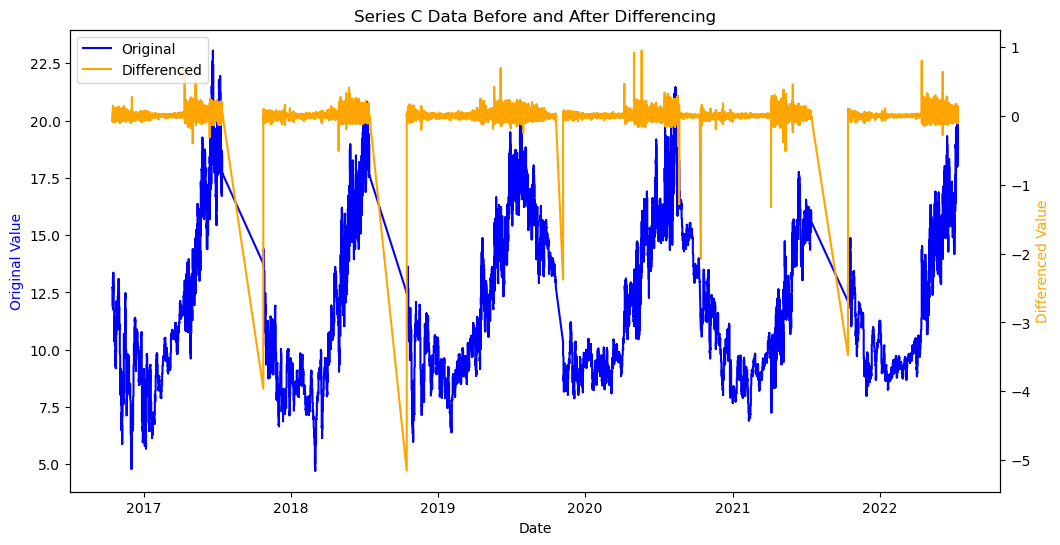

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_C.index, df_C['Temperature'], label='Original', color='blue')
ax2 = ax.twinx()
ax2.plot(df_C.index, df_C['Differenced Series C'], label='Differenced', color='orange')

ax.set_xlabel('Date')
ax.set_ylabel('Original Value', color='blue')
ax2.set_ylabel('Differenced Value', color='orange')
plt.title('Series C Data Before and After Differencing')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

### SERIES D

In [14]:
#continuing with the same process as above....

In [15]:
df_D = pd.read_excel('Series D.xls')
df_D['Date'] = pd.to_datetime(df_D['Date'])
df_D.set_index('Date', inplace=True)
df_D['Temperature'].interpolate(method='linear', inplace=True)
df_D['Differenced Series D'] = df_D['Temperature'].diff()
df_D.dropna(inplace=True)
print(df_D.head())

            Property      Time  Temperature  Differenced Series D
Date                                                             
2014-06-15         2  18:31:00     24.74056              -0.86369
2014-06-15         3  19:01:00     17.45481              -7.28575
2014-06-15         4  19:31:00     16.97423              -0.48058
2014-06-15         5  20:01:00     16.94595              -0.02828
2014-06-15         6  20:31:00     16.88492              -0.06103


In [32]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_D['Differenced Series D'].dropna())
print("ADF p-value:", adf_result[1])

ADF p-value: 4.135726471376443e-30


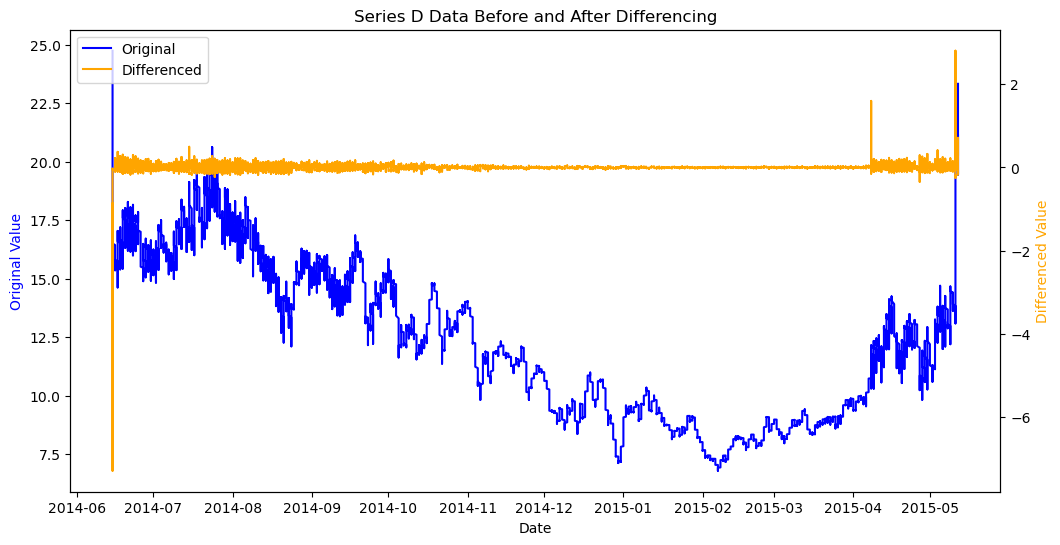

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_D.index, df_D['Temperature'], label='Original', color='blue')
ax2 = ax.twinx()
ax2.plot(df_D.index, df_D['Differenced Series D'], label='Differenced', color='orange')

ax.set_xlabel('Date')
ax.set_ylabel('Original Value', color='blue')
ax2.set_ylabel('Differenced Value', color='orange')
plt.title('Series D Data Before and After Differencing')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## SMARCH DATA

In [ ]:
#continuing with the same process as above....

In [16]:
df_S = pd.read_excel('SMARCH.xlsx')
df_S['Date'] = pd.to_datetime(df_S['Date'])
df_S.set_index('Date', inplace=True)
df_S['Temperature'].interpolate(method='linear', inplace=True)
df_S['Differenced SMARCH'] = df_S['Temperature'].diff()
df_S.dropna(inplace=True)
print(df_S)


                Time  Temperature  Differenced SMARCH
Date                                                 
2018-03-08  10:00:00       21.270               0.140
2018-03-08  10:15:00       21.660               0.390
2018-03-08  10:30:00       22.040               0.380
2018-03-08  10:45:00       22.270               0.230
2018-03-08  11:00:00       22.530               0.260
...              ...          ...                 ...
2021-08-03  11:15:00       19.436              -0.048
2021-08-03  11:30:00       19.532               0.096
2021-08-03  11:39:00       19.532               0.000
2021-08-03  11:39:00       19.532               0.000
2021-08-03  11:40:00       19.532               0.000

[105916 rows x 3 columns]


In [45]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_S['Differenced SMARCH'].dropna())
print("ADF p-value:", adf_result[1])

ADF p-value: 0.0


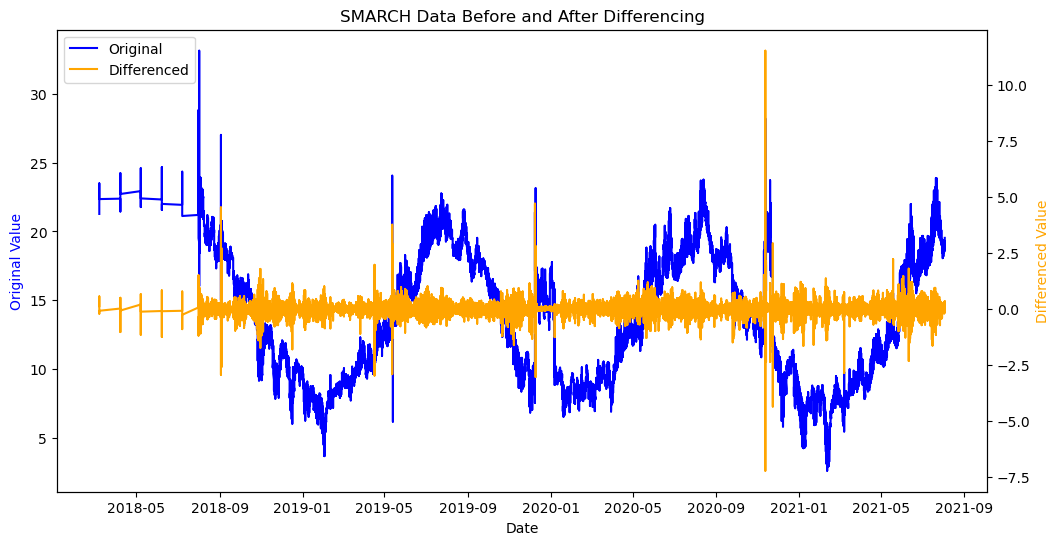

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_S.index, df_S['Temperature'], label='Original', color='blue')
ax2 = ax.twinx()
ax2.plot(df_S.index, df_S['Differenced SMARCH'], label='Differenced', color='orange')

ax.set_xlabel('Date')
ax.set_ylabel('Original Value', color='blue')
ax2.set_ylabel('Differenced Value', color='orange')
plt.title('SMARCH Data Before and After Differencing')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## EMS DATA

In [ ]:
#continuing with the same process as above....

In [17]:
df_E = pd.read_excel('EMS.xlsx')
df_E['Date'] = pd.to_datetime(df_E['Date'])
df_E.set_index('Date', inplace=True)
df_E['Temperature'].interpolate(method='linear', inplace=True)
df_E['Differenced EMS'] = df_E['Temperature'].diff()
df_E.dropna(inplace=True)
print(df_E)

           Unnamed: 1  Temperature  Differenced EMS
Date                                               
1991-05-02   09:00:54         8.50             0.05
1991-05-02   09:15:54         8.60             0.10
1991-05-02   09:30:54         8.70             0.10
1991-05-02   09:45:54         8.80             0.10
1991-05-02   10:00:54         8.90             0.10
...               ...          ...              ...
2012-07-05   22:58:58        16.60             0.00
2012-07-05   23:13:58        16.50            -0.10
2012-07-05   23:28:58        16.45            -0.05
2012-07-05   23:43:58        16.45             0.00
2012-07-05   23:58:58        16.40            -0.05

[672457 rows x 3 columns]


In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_E['Differenced EMS'].dropna())
print("ADF p-value:", adf_result[1])

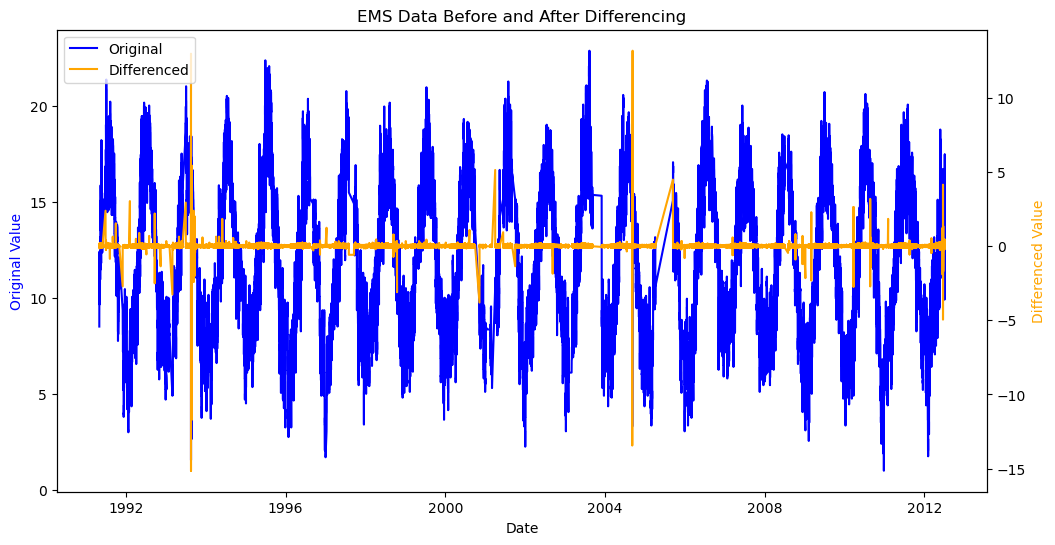

In [72]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_E.index, df_E['Temperature'], label='Original', color='blue')
ax2 = ax.twinx()
ax2.plot(df_E.index, df_E['Differenced EMS'], label='Differenced', color='orange')

ax.set_xlabel('Date')
ax.set_ylabel('Original Value', color='blue')
ax2.set_ylabel('Differenced Value', color='orange')
plt.title('EMS Data Before and After Differencing')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## TINYTAG DATA

In [9]:
#continuing with the same process as above....

In [18]:
df_T = pd.read_excel('TinyTag.xlsx')
df_T['Date'] = pd.to_datetime(df_T['Date'])
df_T.set_index('Date', inplace=True)
df_T['Temperature'].interpolate(method='linear', inplace=True)
df_T['Differenced TinyTag'] = df_T['Temperature'].diff()
df_T.dropna(inplace=True)
print(df_T)

                Time  Temperature  Differenced TinyTag
Date                                                  
2016-12-01  01:00:00      11.1625               0.0125
2016-12-01  02:00:00      11.2000               0.0375
2016-12-01  03:00:00      11.2375               0.0375
2016-12-01  04:00:00      11.2500               0.0125
2016-12-01  05:00:00      11.3000               0.0500
...              ...          ...                  ...
2023-05-31  10:05:00      14.2200               0.0910
2023-05-31  10:20:00      14.2830               0.0630
2023-05-31  10:35:00      14.3710               0.0880
2023-05-31  10:50:00      14.4720               0.1010
2023-05-31  11:05:00      14.5880               0.1160

[176550 rows x 3 columns]


In [21]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_T['Differenced TinyTag'].dropna())
print("ADF p-value:", adf_result[1])

ADF p-value: 0.0


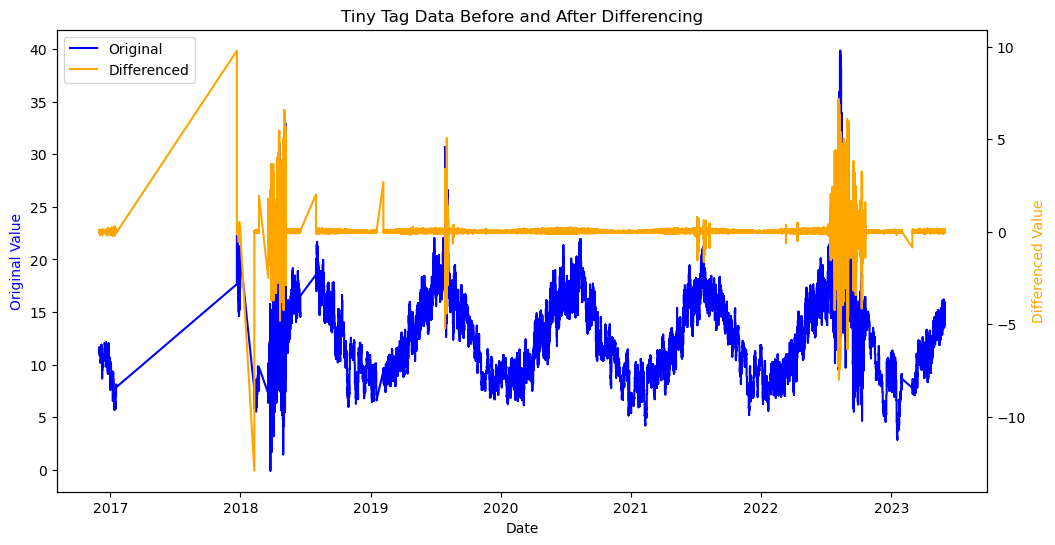

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_T.index, df_T['Temperature'], label='Original', color='blue')
ax2 = ax.twinx()
ax2.plot(df_T.index, df_T['Differenced TinyTag'], label='Differenced', color='orange')

ax.set_xlabel('Date')
ax.set_ylabel('Original Value', color='blue')
ax2.set_ylabel('Differenced Value', color='orange')
plt.title('Tiny Tag Data Before and After Differencing')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# ANOVA TEST

The Analysis of Variance (ANOVA) test is conducted to determine whether there are statistically significant differences 
among the means of three or more groups 

**ANOVA test for John's Data (Series A, B, C and D)**

In [12]:
f_statistic, p_value = stats.f_oneway(df_A['Differenced Series A'], df_B['Differenced Series B'], df_C['Differenced Series C'],df_D['Differenced Series D'])
print("P-Value:", p_value)
if p_value < 0.05: 
    print("There are significant differences among the groups.")
else:
    print("There is no significant difference among the groups.")

P-Value: 0.9858849316407243
There is no significant difference among the groups.


**ANOVA test among John's Data (Series A, B, C and D) and SMARCH Data**

In [13]:
f_statistic, p_value = stats.f_oneway(df_A['Differenced Series A'], df_B['Differenced Series B'], df_C['Differenced Series C'],df_D['Differenced Series D'],df_S['Differenced SMARCH'])
print("P-Value:", p_value)
if p_value < 0.05: 
    print("There are significant differences among the groups.")
else:
    print("There is no significant difference among the groups.")

P-Value: 0.9981849629764493
There is no significant difference among the groups.


**ANOVA test for EMS Data and TinyTag Data**

In [14]:
f_statistic, p_value = stats.f_oneway(df_E['Differenced EMS'],df_T['Differenced TinyTag'])
print("P-Value:", p_value)
if p_value < 0.05: 
    print("There are significant differences among the groups.")
else:
    print("There is no significant difference among the groups.")

P-Value: 0.9777189034769196
There is no significant difference among the groups.


**ANOVA test for John's Data, SMARCH Data, EMS and TinyTag data**

In [11]:
f_statistic, p_value = stats.f_oneway(df_A['Differenced Series A'], df_B['Differenced Series B'], df_C['Differenced Series C'],df_D['Differenced Series D'],df_S['Differenced SMARCH'],df_E['Differenced EMS'],df_T['Differenced TinyTag'])
print("P-Value:", p_value)
if p_value < 0.05: 
    print("There are significant differences among the groups.")
else:
    print("There is no significant difference among the groups.")

P-Value: 0.9999595494947281
There is no significant difference among the groups.


In the ANOVA test, the p value is higher than the significant level making us rejecting the null hypothesis and conclude there are no significant differences in the Tempreture values in different readers. Therefore, all the tempretures readings are from the same population and we can calibrate all of them  together.

# HANDLING OUTLIERS

##  JDB DATA 

### SERIES A
 

            Property      Time  Temperature  Differenced Series A
Date                                                             
2009-01-15        18  18:32:00      7.93974               0.00469
2009-01-15        19  19:02:00      7.93348              -0.00626
2009-01-15        20  19:32:00      7.92566              -0.00782
2009-01-15        21  20:02:00      7.92254              -0.00312
2009-01-15        22  20:32:00      7.91941              -0.00313


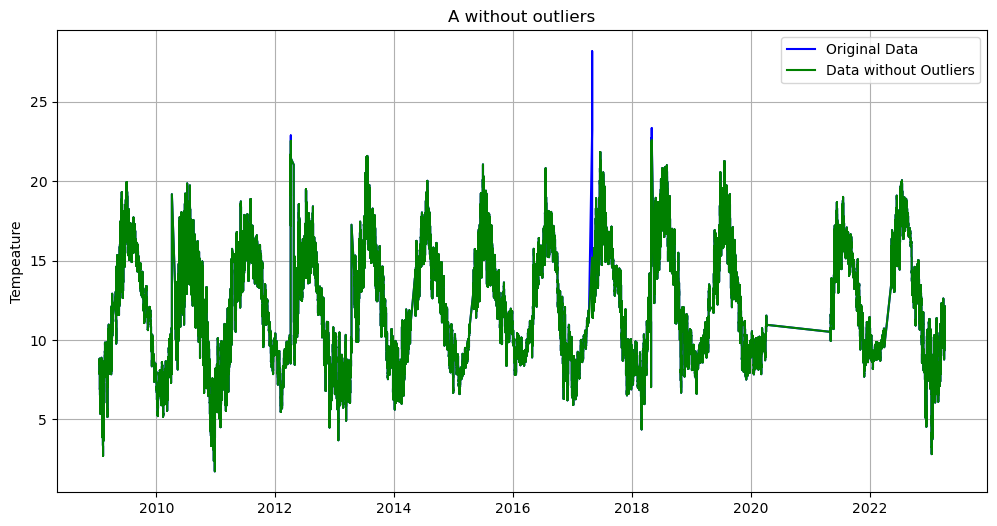

In [19]:
# Calculate the mean of the 'Population Mean' column in the dataframe
mean_value = df_A['Temperature'].mean()

# Calculate the standard deviation of the 'Population Mean' column in the dataframe
std_value = df_A['Temperature'].std()

# Define a threshold (e.g., 3.0 standard deviations) to identify outliers
threshold = 3.0 

# Filter the dataframe to exclude rows where the 'Population Mean' is outside the defined threshold
without_outliers_A = df_A [
    (df_A['Temperature'] >= mean_value - threshold * std_value) &
    (df_A['Temperature'] <= mean_value + threshold * std_value)
]

# dataframe without outliers
print(without_outliers_A.head())

plt.figure(figsize=(12, 6))

# Original data (in blue)
plt.plot(df_A['Temperature'],label='Original Data', color='blue')

# Data without outliers (in red)
plt.plot(without_outliers_A['Temperature'], label='Data without Outliers', color='green')


plt.ylabel('Tempeature')
plt.title('A without outliers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### SERIES B


            Property      Time  Temperature  Differenced Series B
Date                                                             
2009-01-15        18  18:31:00      7.92097               0.00469
2009-01-15        19  19:01:00      7.91784              -0.00313
2009-01-15        20  19:31:00      7.91159              -0.00625
2009-01-15        21  20:01:00      7.90846              -0.00313
2009-01-15        22  20:31:00      7.89907              -0.00939


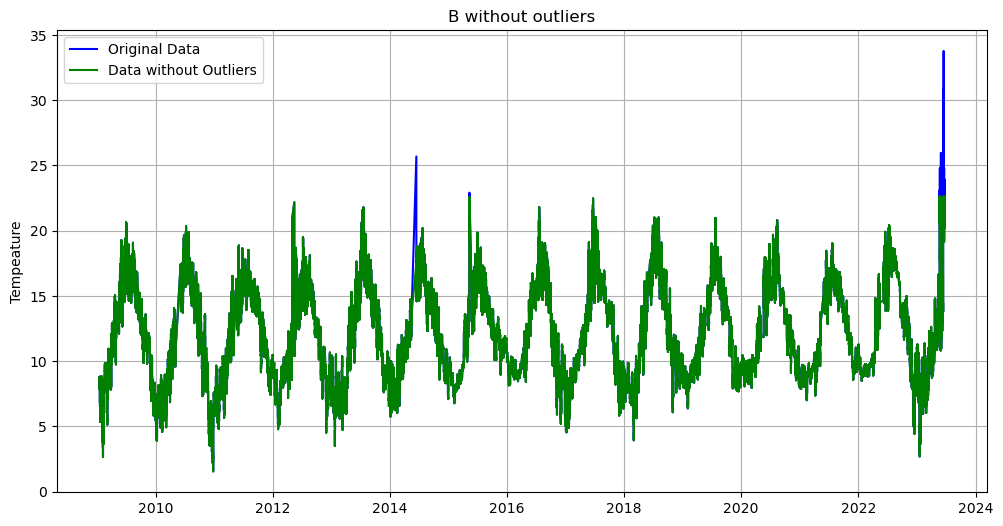

In [20]:
# Calculate the mean of the 'Population Mean' column in the dataframe
mean_value = df_B['Temperature'].mean()

# Calculate the standard deviation of the 'Population Mean' column in the dataframe
std_value = df_B['Temperature'].std()

# Define a threshold (e.g., 3.0 standard deviations) to identify outliers
threshold = 3.0 

# Filter the dataframe to exclude rows where the 'Population Mean' is outside the defined threshold
without_outliers_B = df_B [
    (df_B['Temperature'] >= mean_value - threshold * std_value) &
    (df_B['Temperature'] <= mean_value + threshold * std_value)
]

# dataframe without outliers
print(without_outliers_B.head())

plt.figure(figsize=(12, 6))

# Original data (in blue)
plt.plot(df_B['Temperature'],label='Original Data', color='blue')

# Data without outliers (in red)
plt.plot(without_outliers_B['Temperature'], label='Data without Outliers', color='green')


plt.ylabel('Tempeature')
plt.title('B without outliers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### SERIES C


                Time  Temperature  Differenced Series C
Date                                                   
2016-10-15  14:01:00     12.72232               0.05434
2016-10-15  14:31:00     12.72835               0.00603
2016-10-15  15:01:00     12.68458              -0.04377
2016-10-15  15:31:00     12.61212              -0.07246
2016-10-15  16:01:00     12.52754              -0.08458


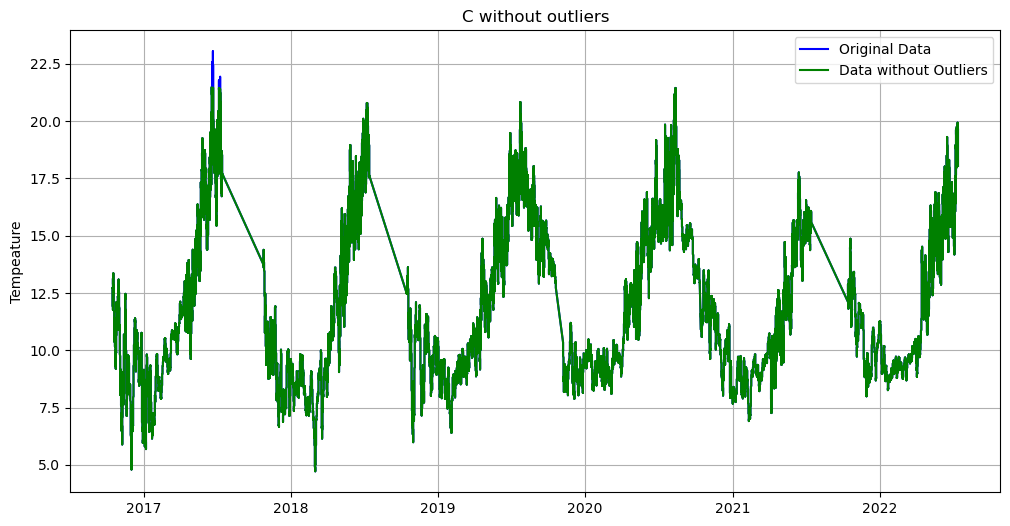

In [21]:
# Calculate the mean of the 'Population Mean' column in the dataframe
mean_value = df_C['Temperature'].mean()

# Calculate the standard deviation of the 'Population Mean' column in the dataframe
std_value = df_C['Temperature'].std()

# Define a threshold (e.g., 3.0 standard deviations) to identify outliers
threshold = 3.0 

# Filter the dataframe to exclude rows where the 'Population Mean' is outside the defined threshold
without_outliers_C = df_C [
    (df_C['Temperature'] >= mean_value - threshold * std_value) &
    (df_C['Temperature'] <= mean_value + threshold * std_value)
]

# dataframe without outliers
print(without_outliers_C.head())

plt.figure(figsize=(12, 6))

# Original data (in blue)
plt.plot(df_C['Temperature'],label='Original Data', color='blue')

# Data without outliers (in red)
plt.plot(without_outliers_C['Temperature'], label='Data without Outliers', color='green')


plt.ylabel('Tempeature')
plt.title('C without outliers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### SERIES D


            Property      Time  Temperature  Differenced Series D
Date                                                             
2014-06-15         3  19:01:00     17.45481              -7.28575
2014-06-15         4  19:31:00     16.97423              -0.48058
2014-06-15         5  20:01:00     16.94595              -0.02828
2014-06-15         6  20:31:00     16.88492              -0.06103
2014-06-15         7  21:01:00     16.83282              -0.05210


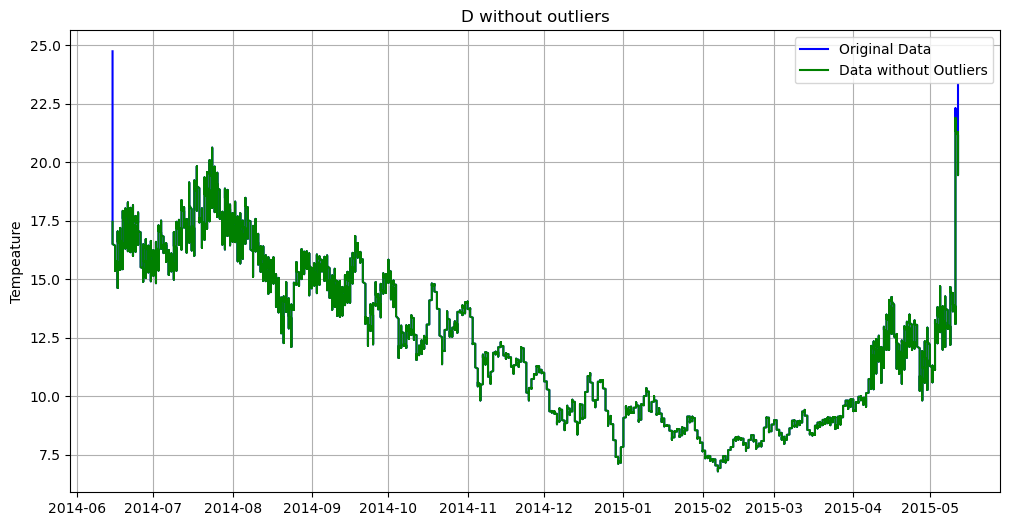

In [22]:
# Calculate the mean of the 'Population Mean' column in the dataframe
mean_value = df_D['Temperature'].mean()

# Calculate the standard deviation of the 'Population Mean' column in the dataframe
std_value = df_D['Temperature'].std()

# Define a threshold (e.g., 3.0 standard deviations) to identify outliers
threshold = 3.0 

# Filter the dataframe to exclude rows where the 'Population Mean' is outside the defined threshold
without_outliers_D = df_D [
    (df_D['Temperature'] >= mean_value - threshold * std_value) &
    (df_D['Temperature'] <= mean_value + threshold * std_value)
]

# dataframe without outliers
print(without_outliers_D.head())

plt.figure(figsize=(12, 6))

# Original data (in blue)
plt.plot(df_D['Temperature'],label='Original Data', color='blue')

# Data without outliers (in red)
plt.plot(without_outliers_D['Temperature'], label='Data without Outliers', color='green')


plt.ylabel('Tempeature')
plt.title('D without outliers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## SMARCH DATA

                Time  Temperature  Differenced SMARCH
Date                                                 
2018-03-08  10:00:00        21.27                0.14
2018-03-08  10:15:00        21.66                0.39
2018-03-08  10:30:00        22.04                0.38
2018-03-08  10:45:00        22.27                0.23
2018-03-08  11:00:00        22.53                0.26


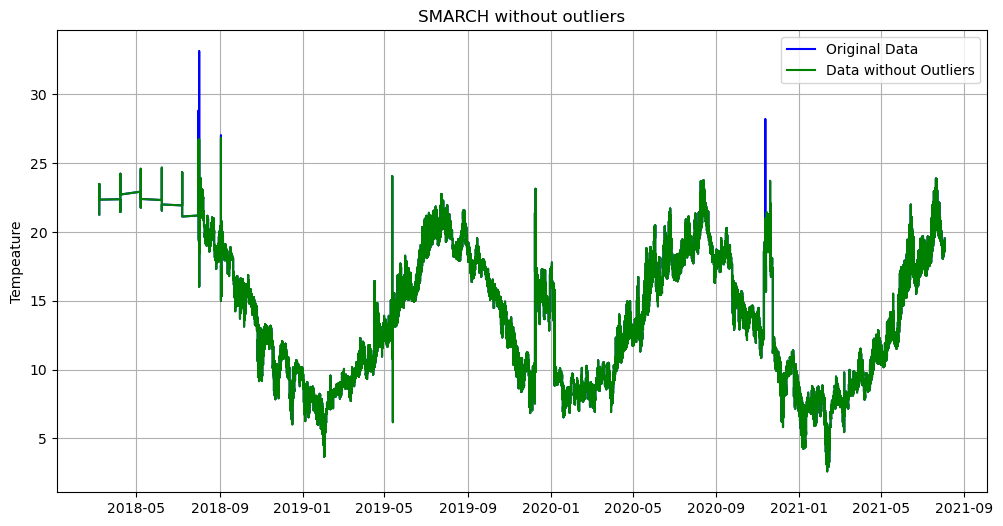

In [23]:
# Calculate the mean of the 'Population Mean' column in the dataframe
mean_value = df_S['Temperature'].mean()

# Calculate the standard deviation of the 'Population Mean' column in the dataframe
std_value = df_S['Temperature'].std()

# Define a threshold (e.g., 3.0 standard deviations) to identify outliers
threshold = 3.0 

# Filter the dataframe to exclude rows where the 'Population Mean' is outside the defined threshold
without_outliers_SMARCH = df_S [
    (df_S['Temperature'] >= mean_value - threshold * std_value) &
    (df_S['Temperature'] <= mean_value + threshold * std_value)
]

# dataframe without outliers
print(without_outliers_SMARCH.head())

plt.figure(figsize=(12, 6))

# Original data (in blue)
plt.plot(df_S['Temperature'],label='Original Data', color='blue')

# Data without outliers (in red)
plt.plot(without_outliers_SMARCH['Temperature'], label='Data without Outliers', color='green')


plt.ylabel('Tempeature')
plt.title('SMARCH without outliers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

##  EMS DATA

           Unnamed: 1  Temperature  Differenced EMS
Date                                               
1991-05-02   09:00:54          8.5             0.05
1991-05-02   09:15:54          8.6             0.10
1991-05-02   09:30:54          8.7             0.10
1991-05-02   09:45:54          8.8             0.10
1991-05-02   10:00:54          8.9             0.10


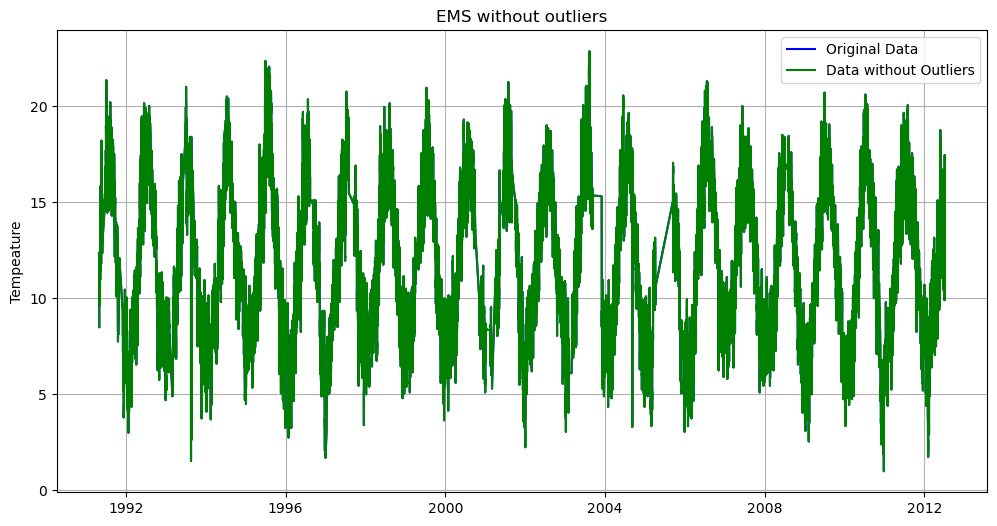

In [24]:
# Calculate the mean of the 'Population Mean' column in the dataframe
mean_value = df_E['Temperature'].mean()

# Calculate the standard deviation of the 'Population Mean' column in the dataframe
std_value = df_E['Temperature'].std()

# Define a threshold (e.g., 3.0 standard deviations) to identify outliers
threshold = 3.0 

# Filter the dataframe to exclude rows where the 'Population Mean' is outside the defined threshold
without_outliers_EMS = df_E [
    (df_E['Temperature'] >= mean_value - threshold * std_value) &
    (df_E['Temperature'] <= mean_value + threshold * std_value)
]

# dataframe without outliers
print(without_outliers_EMS.head())

plt.figure(figsize=(12, 6))

# Original data (in blue)
plt.plot(df_E['Temperature'],label='Original Data', color='blue')

# Data without outliers (in red)
plt.plot(without_outliers_EMS['Temperature'], label='Data without Outliers', color='green')


plt.ylabel('Tempeature')
plt.title('EMS without outliers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

##  TINYTAG DATA

                Time  Temperature  Differenced TinyTag
Date                                                  
2016-12-01  01:00:00      11.1625               0.0125
2016-12-01  02:00:00      11.2000               0.0375
2016-12-01  03:00:00      11.2375               0.0375
2016-12-01  04:00:00      11.2500               0.0125
2016-12-01  05:00:00      11.3000               0.0500


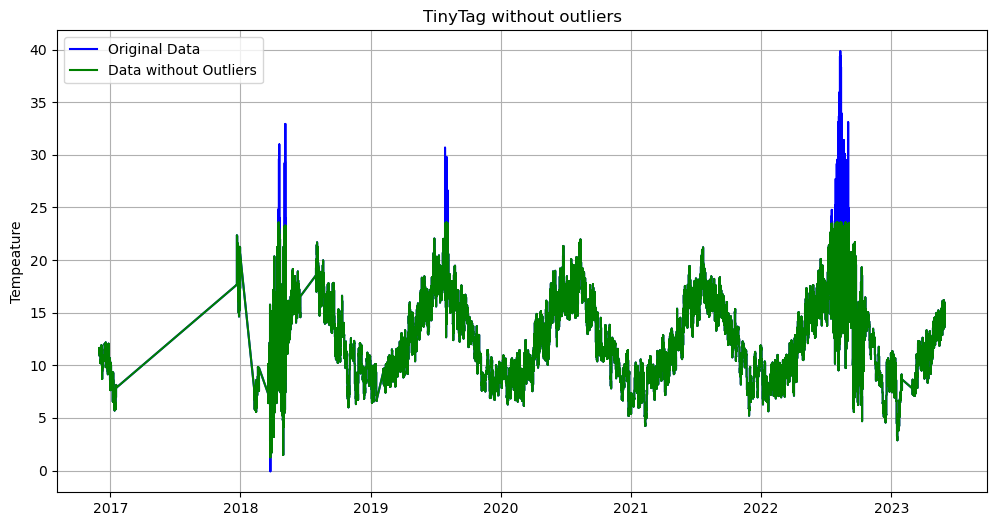

In [25]:
# Calculate the mean of the 'Population Mean' column in the dataframe
mean_value = df_T['Temperature'].mean()

# Calculate the standard deviation of the 'Population Mean' column in the dataframe
std_value = df_T['Temperature'].std()

# Define a threshold (e.g., 3.0 standard deviations) to identify outliers
threshold = 3.0 

# Filter the dataframe to exclude rows where the 'Population Mean' is outside the defined threshold
without_outliers_TinyTag = df_T [
    (df_T['Temperature'] >= mean_value - threshold * std_value) &
    (df_T['Temperature'] <= mean_value + threshold * std_value)
]

# dataframe without outliers
print(without_outliers_TinyTag.head())

plt.figure(figsize=(12, 6))

# Original data (in blue)
plt.plot(df_T['Temperature'],label='Original Data', color='blue')

# Data without outliers (in red)
plt.plot(without_outliers_TinyTag['Temperature'], label='Data without Outliers', color='green')


plt.ylabel('Tempeature')
plt.title('TinyTag without outliers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# CALCULATE DAILY MEANS AND CALIBERATE READERS

In [26]:

# Create a list of dataframes representing different populations 
population_dataframes = [without_outliers_A, without_outliers_B, without_outliers_C, without_outliers_D, without_outliers_SMARCH, without_outliers_EMS, without_outliers_TinyTag] 
# Create an empty dataframe to store daily mean temperatures for each population
population_daily_mean_temperatures = pd.DataFrame()

# Iterate through each dataframe in the population_dataframes list
for df in population_dataframes:
    # Calculate the daily mean temperature by resampling the 'Temperature' column to daily frequency
    daily_mean = df['Temperature'].resample('D').mean() 
    # Concatenate the daily mean temperature series to the population_daily_mean_temperatures dataframe
    population_daily_mean_temperatures = pd.concat([population_daily_mean_temperatures, daily_mean], axis=1)
    
# Calculate the overall daily mean temperature for all populations and add it as a new column
population_daily_mean_temperatures['Daily Mean'] = population_daily_mean_temperatures.mean(axis=1)
# Reset the index of the dataframe to have a clean index column
population_daily_mean_temperatures.reset_index(inplace=True)
#resulting dataframe containing daily mean temperatures for each population
population_daily_mean_temperatures.head()


,index,Temperature,Temperature,Temperature,Temperature,Temperature,Temperature,Temperature,Daily Mean
0,2009-01-15,7.909880,7.891961,NaN,NaN,NaN,7.517187,NaN,7.773009
1,2009-01-16,8.264485,8.246459,NaN,NaN,NaN,8.124479,NaN,8.211808
2,2009-01-17,8.679245,8.661384,NaN,NaN,NaN,8.480729,NaN,8.607119
3,2009-01-18,7.780242,7.763765,NaN,NaN,NaN,7.504688,NaN,7.682898
4,2009-01-19,6.784125,6.768368,NaN,NaN,NaN,6.589062,NaN,6.713852


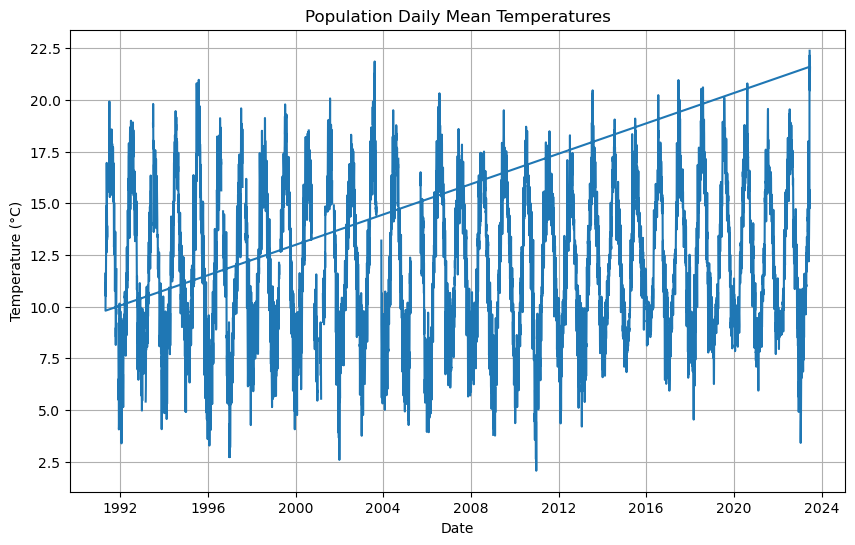

In [28]:
#plotting the daily mean tempreture
dates = population_daily_mean_temperatures['index']
population_mean = population_daily_mean_temperatures['Daily Mean']


plt.figure(figsize=(10, 6)) 
plt.plot(dates, population_mean, linestyle='-')
plt.title('Population Daily Mean Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)') 
plt.grid(True)
plt.show()


In [32]:
df_daily_means = pd.DataFrame(population_daily_mean_temperatures)
df_daily_means = df_daily_means.rename(columns={'index': 'Date'})
df_daily_means = df_daily_means[['Date', 'Daily Mean']]  
df_daily_means.head()


,Date,Daily Mean
0,2009-01-15,7.773009
1,2009-01-16,8.211808
2,2009-01-17,8.607119
3,2009-01-18,7.682898
4,2009-01-19,6.713852


In [33]:
excel_file = 'daily_means.xlsx'

# Save the DataFrame to an Excel file
df_daily_means.to_excel(excel_file, index=False)

print(f'Data saved to {excel_file}')

Data saved to daily_means.xlsx


#  FINDING THE NUMBER OF MISSING DAYS 

In [34]:
df_daily_means.set_index('Date', inplace=True)
df_daily_means.head()

,Daily Mean
Date,
2009-01-15,7.773009
2009-01-16,8.211808
2009-01-17,8.607119
2009-01-18,7.682898
2009-01-19,6.713852


In [39]:
df_daily_means.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11741 entries, 1991-05-02 to 2023-06-23
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Daily Mean  11029 non-null  float64
dtypes: float64(1)
memory usage: 183.5 KB


In [41]:
min(df_daily_means.index)

Timestamp('1991-05-02 00:00:00')

In [42]:
max(df_daily_means.index)

Timestamp('2023-06-23 00:00:00')

In [43]:
all_datetimes = pd.date_range(min(df_daily_means.index), max(df_daily_means.index), freq="D")
all_datetimes

DatetimeIndex(['1991-05-02', '1991-05-03', '1991-05-04', '1991-05-05',
               '1991-05-06', '1991-05-07', '1991-05-08', '1991-05-09',
               '1991-05-10', '1991-05-11',
               ...
               '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-17',
               '2023-06-18', '2023-06-19', '2023-06-20', '2023-06-21',
               '2023-06-22', '2023-06-23'],
              dtype='datetime64[ns]', length=11741, freq='D')

In [39]:
missing_no_of_days = 11741-11029
missing_no_of_days                                  

712